In [29]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
file_path = "~/data/data/bike-sharing-demand/train.csv"

data = pd.read_csv(file_path)

In [31]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

print(data.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

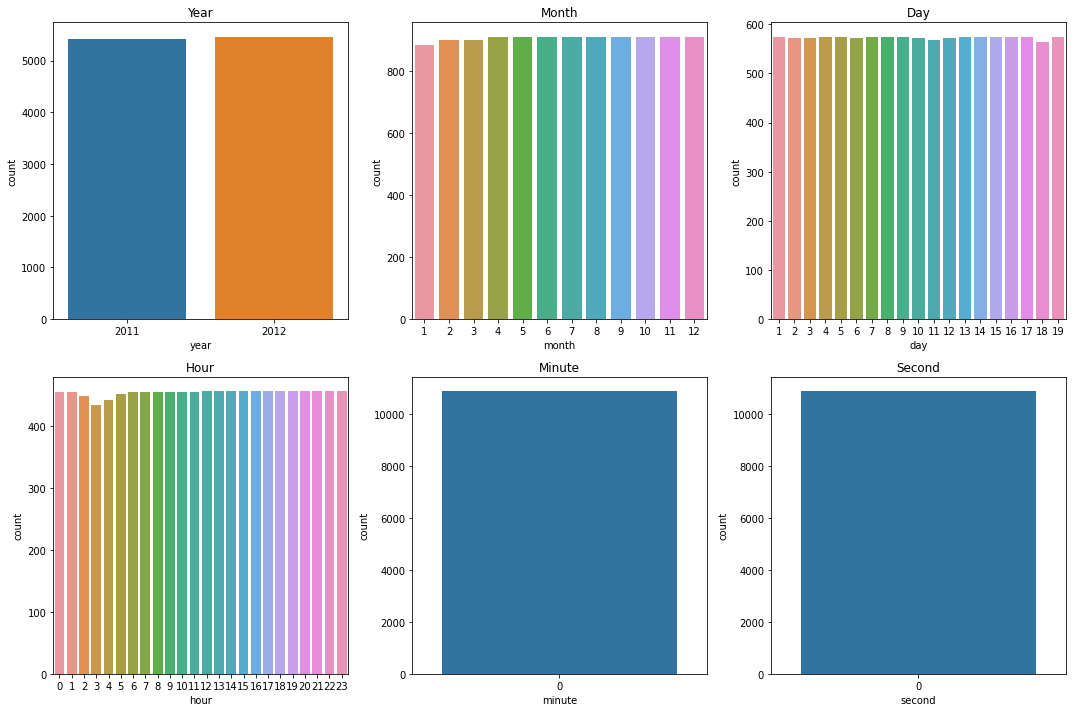

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.countplot(x='year', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Year')

sns.countplot(x='month', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Month')

sns.countplot(x='day', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Day')

sns.countplot(x='hour', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Hour')

sns.countplot(x='minute', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Minute')

sns.countplot(x='second', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Second')

plt.tight_layout()
plt.show()

In [33]:
# Removing 'casual' and 'registered'collumns
data = data.drop(['casual', 'registered'], axis=1)

In [34]:
# Removing 'datetime' from column
X = data.drop(['count', 'datetime'], axis=1)
y = data['count']
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22,0,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8708, 14)
X_test shape: (2178, 14)
y_train shape: (8708,)
y_test shape: (2178,)


In [37]:
#Linear Regression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#MSE
mse = mean_squared_error(y_test, y_pred)

#r2(R-squared): 결정계수로 모델이 종속 변수의 변동을 얼마나 설명하는지를 나타내는 지표
#0-1사이의 범위를 가지며,높을수록 모델이 데이터를 더 잘 나타낸 것임.
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 19945.370053754035
R-squared: 0.3957218526642551


In [38]:
y_pred = model.predict(X_test)

# MSE, RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE는 squared=False로 설정

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)


Mean Squared Error (MSE): 19945.370053754035
Root Mean Squared Error (RMSE): 141.22807813517124
       Actual   Predicted
3133      127  248.106270
5786       13   48.797655
5224      163  200.906767
8953      233  292.785832
8054      222  388.486548
...       ...         ...
1963      351  224.130198
5807        2   68.593142
10061     509  309.752802
5427        5   38.170302
7588      239  243.626974

[2178 rows x 2 columns]


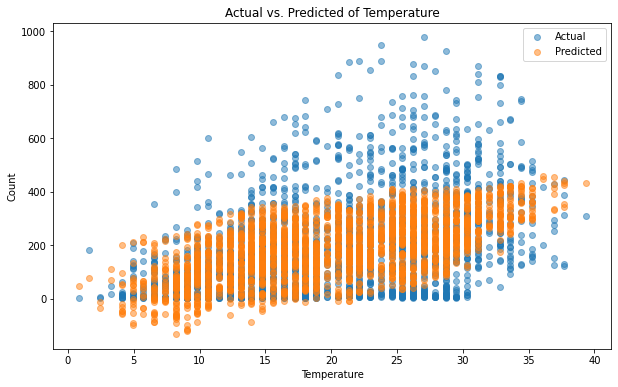

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['temp'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['temp'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Actual vs. Predicted of Temperature')
plt.legend()
plt.show()

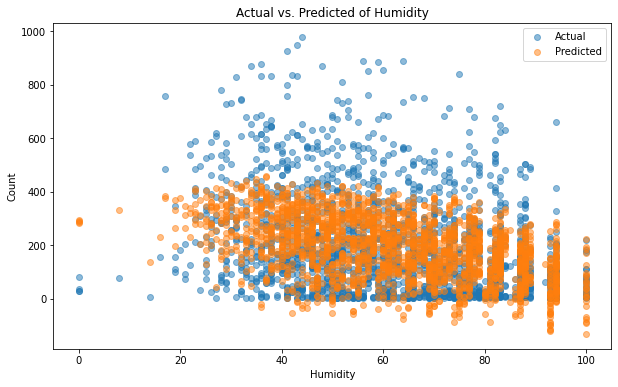

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['humidity'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['humidity'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Actual vs. Predicted of Humidity')
plt.legend()
plt.show()
